In [1]:
import numpy as np
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score  
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matplotlib.rcParams['figure.figsize'] = (10,5)

In [2]:
missing_values = ['N/A','--','n/a','NaN','na']
data=pd.read_csv(r"C:\Users\Nirav\OneDrive\Desktop\alz paper related\Dataset\OASIS2.csv",na_values=missing_values)
print("total no.of rows and columns:",data.shape)
print("total size:",data.size)

total no.of rows and columns: (373, 15)
total size: 5595


In [3]:
profile = ProfileReport(data, title="Pandas Profiling Report",explorative=True)

In [4]:
profile.to_widgets()

In [5]:
data.columns=data.columns.str.capitalize()  

In [6]:
#Handling missing data
data["Ses"].fillna(data.groupby("Educ")["Ses"].transform("median"), inplace=True)
# imputing MMSE with median values
data['Mmse'].fillna((data['Mmse'].median()), inplace=True)

In [7]:
def categorize_Cdr(Cdr):
  if  Cdr <=0 :
    return "Non-demented"
  elif 0.1 < Cdr <= 0.5:
    return "mild demented"
  elif 0.6 < Cdr <= 1:
    return "very mild demented"
  elif 1.1 < Cdr <= 2:
    return "moderate dementia"
  elif 2.1 < Cdr <= 3:
    return "Severe dementia"

data['Dementia_category_Cdr'] = data['Cdr'].apply(lambda x: categorize_Cdr(x))

In [8]:
pd.crosstab(data['Group'],data['Dementia_category_Cdr'])

Dementia_category_Cdr,Non-demented,mild demented,moderate dementia,very mild demented
Group,,,,
Converted,18,19,0,0
Demented,0,102,3,41
Nondemented,188,2,0,0


In [9]:
data = data.drop(['Mri id', 'Hand','Subject id','Visit','Group','Mr delay'], axis=1) # Drop unnecessary columns

In [10]:
data.rename(columns = {'M/f':'Gender'}, inplace = True) 

In [11]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['Gender'].unique()

array([1, 0])

In [12]:
label_encoder = preprocessing.LabelEncoder()
data['Dementia_category_Cdr']= label_encoder.fit_transform(data['Dementia_category_Cdr']) 
data['Dementia_category_Cdr'].unique()

array([0, 1, 3, 2])

In [13]:
data1=data.copy()

In [14]:
data1['Dementia_category_Cdr'].value_counts()

0    206
1    123
3     41
2      3
Name: Dementia_category_Cdr, dtype: int64

In [15]:
data_majority = data1[data1.Dementia_category_Cdr==0]
data_minority = data1[data1.Dementia_category_Cdr==1]
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=180,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Dementia_category_Cdr'].value_counts()

0    206
1    180
Name: Dementia_category_Cdr, dtype: int64

In [16]:
data_majority = data1[data1.Dementia_category_Cdr==1]
data_minority1 = data1[data1.Dementia_category_Cdr==2]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=180,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Dementia_category_Cdr'].value_counts()

0    206
2    180
1    180
Name: Dementia_category_Cdr, dtype: int64

In [17]:
data_majority = data1[data1.Dementia_category_Cdr==1]
data_minority2 = data1[data1.Dementia_category_Cdr==3]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=180,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Dementia_category_Cdr'].value_counts()

0    206
3    180
2    180
1    180
Name: Dementia_category_Cdr, dtype: int64

In [18]:
data1=data_upsampled.copy()

In [19]:
data1.shape

(746, 10)

<AxesSubplot:>

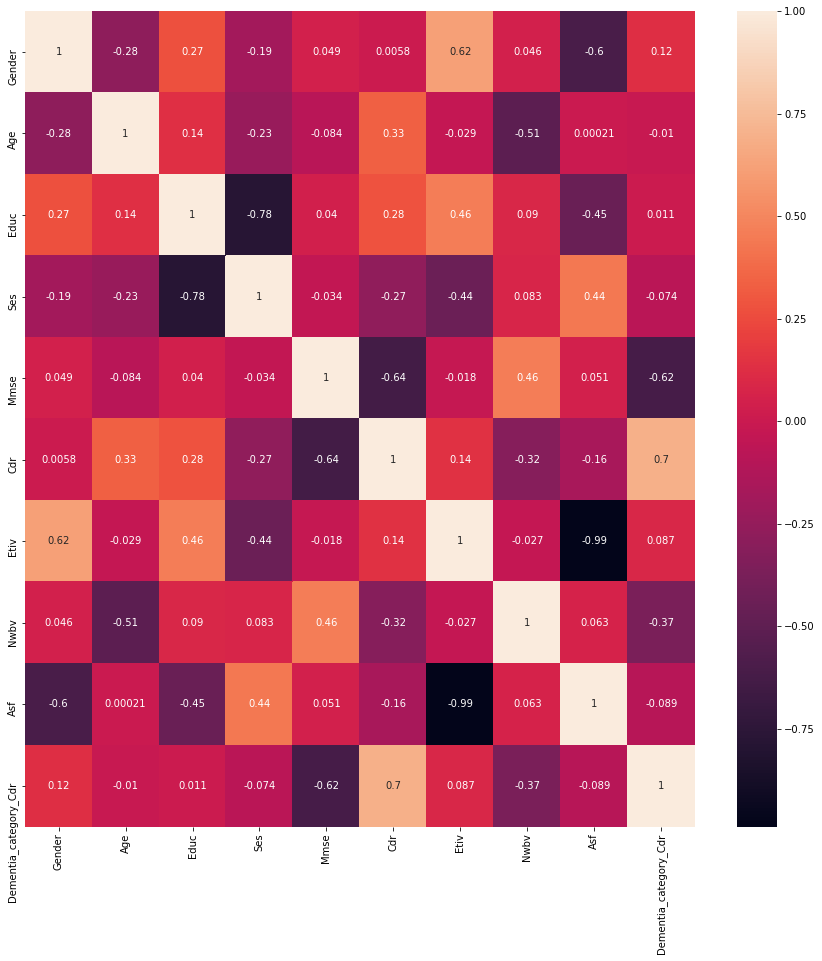

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(), annot = True)

# RANDOM FOREST

In [21]:
X=data1.iloc[:,:-1]
y = pd.DataFrame(data1.iloc[:,-1])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
print(pca.explained_variance_ratio_)

[0.3675935  0.24553844 0.14631931 0.10050271 0.05402744]


In [26]:
clf0= RandomForestClassifier(n_estimators = 20,max_depth=None,criterion='gini', min_samples_split=2, min_samples_leaf=1,max_features='auto') 
clf0.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [27]:
y_pred = clf0.predict(X_test)

In [28]:
RF1=accuracy_score(y_test, y_pred)
print('accuracy:',RF1)

accuracy: 0.9464285714285714


In [29]:
print( np.mean(cross_val_score(clf0, X_train, y_train, cv=10)))

0.9367198838896951


In [30]:
RF1=accuracy_score(y_test, y_pred)
print('accuracy:',RF1)
cm = metrics.confusion_matrix(y_test,y_pred)
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall)/(precision+recall)
print("False positive",FP)
print("True positive",TP)
print("False negative",FN)
print("True negative",TN)
print("Precision",precision)
print("Recall", recall)
print("F1_score",F1_Score)

accuracy: 0.9464285714285714
False positive [7. 5. 0. 0.]
True positive [70. 51. 45. 46.]
False negative [5. 7. 0. 0.]
True negative [142. 161. 179. 178.]
Precision [0.90909091 0.91071429 1.         1.        ]
Recall [0.93333333 0.87931034 1.         1.        ]
F1_score [0.92105263 0.89473684 1.         1.        ]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        75
           1       0.91      0.88      0.89        58
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        46

    accuracy                           0.95       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.95      0.95      0.95       224



# Random forest with boruta

In [32]:
from boruta import BorutaPy

In [33]:
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size = 0.3)

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train11 = sc.fit_transform(X_train11)
X_test11 = sc.transform(X_test11)

In [35]:
clf=RandomForestClassifier(n_estimators = 20)

In [36]:
boruta_selector = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train11), np.array(y_train11))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	0
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(n_estimators=42,
                                          random_state=RandomState(MT19937) at 0x1EB6BF47440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1EB6BF47440, verbose=2)

In [37]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [2 1 1 1 1 1 1 1 1]
No. of significant features:  8


In [38]:
selected_rf_features = pd.DataFrame({'Feature':list(X.columns),
                                       'Ranking':boruta_selector.ranking_})

In [39]:
selected_rf_features.sort_values(by='Ranking') 

,Feature,Ranking
1,Age,1
2,Educ,1
3,Ses,1
4,Mmse,1
5,Cdr,1
6,Etiv,1
7,Nwbv,1
8,Asf,1
0,Gender,2


In [40]:
X_important_train = boruta_selector.transform(np.array(X_train11))
X_important_test = boruta_selector.transform(np.array(X_test11))

In [41]:
clf1=RandomForestClassifier(n_estimators = 42,max_depth=None,criterion='gini', min_samples_split=2, min_samples_leaf=1,max_features='auto') 
clf1.fit(X_important_train, y_train11) 

RandomForestClassifier(n_estimators=42)

In [42]:
accuracy_score(y_test11, clf1.predict(X_important_test))

1.0

In [43]:
print( np.mean(cross_val_score(clf1, X_important_train, y_train11, cv=10)))

1.0


In [44]:
print(classification_report(y_test11, clf1.predict(X_important_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        55

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [45]:
RB1=accuracy_score(y_test11, clf1.predict(X_important_test))
print('accuracy:',RB1)
cm = metrics.confusion_matrix(y_test11,clf1.predict(X_important_test))
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall)/(precision+recall)
print("False positive",FP)
print("True positive",TP)
print("False negative",FN)
print("True negative",TN)
print("Precision",precision)
print("Recall", recall)
print("F1_score",F1_Score)

accuracy: 1.0
False positive [0. 0. 0. 0.]
True positive [60. 53. 56. 55.]
False negative [0. 0. 0. 0.]
True negative [164. 171. 168. 169.]
Precision [1. 1. 1. 1.]
Recall [1. 1. 1. 1.]
F1_score [1. 1. 1. 1.]


# SUPPORT VECTOR MACHINE

In [46]:
X1=data1.iloc[:,:-1]
y1 = pd.DataFrame(data1.iloc[:,-1])

In [47]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3)

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [49]:
# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train1,y_train1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.587, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.663, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.808, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.596, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.587, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.276, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [52]:
from sklearn import svm

#Create a svm Classifier
svm1 = svm.SVC(kernel='rbf',C= 10, gamma = 0.1)

#Train the model using the training sets
svm1.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred1 = svm1.predict(X_test1)

#Create a svm Classifier
svm1 = svm.SVC(kernel='rbf',C= 1000, gamma = 0.1)

#Train the model using the training sets
svm1.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred1 = svm1.predict(X_test1)

In [53]:
SVC1=accuracy_score(y_test1, y_pred1) 
print('accuracy:',SVC1)
cm1 = metrics.confusion_matrix(y_test1,y_pred1)
FP1 = cm1.sum(axis=0) - np.diag(cm1) 
FN1 = cm1.sum(axis=1) - np.diag(cm1)
TP1 = np.diag(cm1)
TN1 = cm1.sum() - (FP1 + FN1 + TP1)
FP1 = FP1.astype(float)
FN1 = FN1.astype(float)
TP1 = TP1.astype(float)
TN1 = TN1.astype(float)
precision1 = TP1/(TP1+FP1)
recall1 = TP1/(TP1+FN1)
F1_Score1 = 2*(precision1*recall1)/(precision1+recall1)
print("False positive",FP1)
print("True positive",TP1)
print("False negative",FN1)
print("True negative",TN1)
print("Precision",precision1)
print("Recall", recall1)
print("F1_score",F1_Score1)

accuracy: 0.9732142857142857
False positive [1. 3. 0. 2.]
True positive [60. 53. 52. 53.]
False negative [2. 3. 0. 1.]
True negative [161. 165. 172. 168.]
Precision [0.98360656 0.94642857 1.         0.96363636]
Recall [0.96774194 0.94642857 1.         0.98148148]
F1_score [0.97560976 0.94642857 1.         0.97247706]


In [54]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.95      0.95      0.95        56
           2       1.00      1.00      1.00        52
           3       0.96      0.98      0.97        54

    accuracy                           0.97       224
   macro avg       0.97      0.97      0.97       224
weighted avg       0.97      0.97      0.97       224



In [55]:
print( np.mean(cross_val_score(svm1, X_train1, y_train1, cv=10)))

0.9482583454281567
